In [14]:
import os
def change_to_code_dir():
    current_dir = os.getcwd()
    if os.path.basename(current_dir) == "p2ch15":
        parent_dir = os.path.dirname(current_dir)
        os.chdir(parent_dir)    
change_to_code_dir()

In [1]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\howardhuang\AppData\Local\Temp\pip-req-build-s0tmoqfm'

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\howardhuang\appdata\local\temp\pip-req-build-s0tmoqfm
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36839 sha256=93abcfc5966c2e403298a1a21909f3617d9a6b24624d1dad336a7f33876e3444
  Stored in directory: C:\Users\howardhuang\AppData\Local\Temp\pip-ephem-wheel-cache-1z6lppqa\wheels\29\82\ff\04e2be9805a1cb48bec0b85b5a6da6b63f647645750a0e42d4
Successfully built segment_anything


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from p2ch15.utils import get_sam_model

In [17]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_config, model_weights_path = get_sam_model()
sam = sam_model_registry[model_config](checkpoint=model_weights_path)
sam.to(device)
mask_generator = SamAutomaticMaskGenerator(sam)

In [18]:
# Load the local image
# image_path = "../images/ch02/ch02-4.png"
image_path = "data/p2ch10/astronaut.png"
image = Image.open(image_path).convert("RGB")

(height=1024, width=1024)


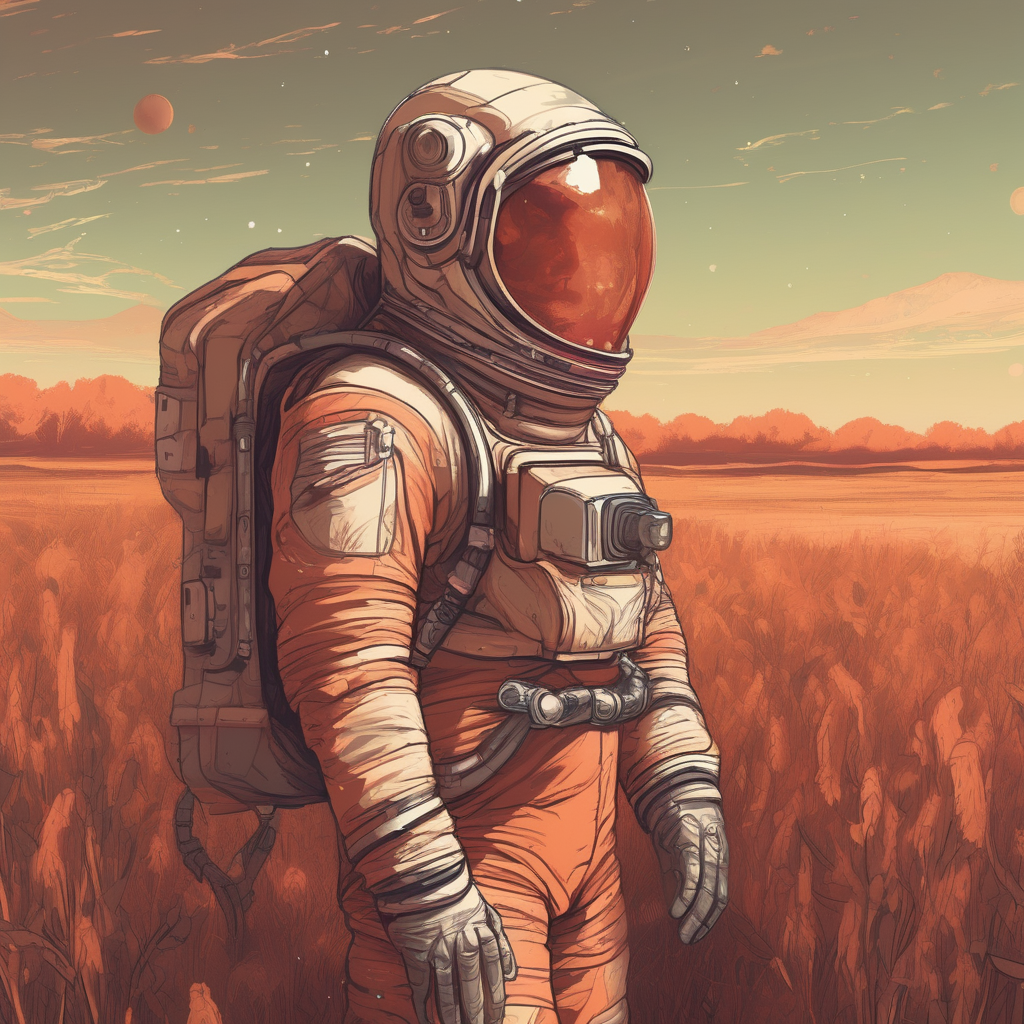

In [19]:
width, height = image.size
print(f"({height=}, {width=})")
image

In [20]:
np.array(image).shape

(1024, 1024, 3)

In [21]:
image_array = np.array(image)
masks = mask_generator.generate(image_array)

In [7]:
print(len(masks))
print(masks[0]["segmentation"].shape)
print(masks[0]["predicted_iou"])

79
(1024, 1024)
1.033138632774353


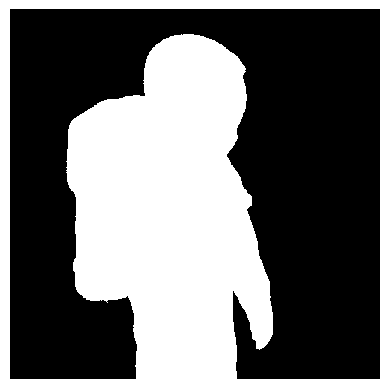

In [25]:
def plot_mask(mask):
    """
    Plots a boolean mask as a black and white image.
    Parameters:
    mask (numpy.ndarray): A 2D array of boolean values.
    """
    if not isinstance(mask, np.ndarray) or mask.dtype != bool:
        raise ValueError("Input must be a numpy array of boolean values.")
    
    # Convert the boolean mask to an integer array (True -> 1, False -> 0)
    int_mask = mask.astype(int)
    # Plot the mask
    plt.imshow(int_mask, cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.show()

plot_mask(masks[3]["segmentation"])

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_original_image_with_masks(image, masks):
    """
    Plots the image with masks overlaid in different colors.
    Args:
        image (PIL.Image): The original image.
        masks (list of np.ndarray): List of boolean masks.
    """
    # Convert image to numpy array
    image_np = np.array(image)
    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image_np)
    # Generate a colormap
    cmap = plt.get_cmap('hsv')
    num_colors = len(masks)
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    # Plot each mask
    for i, mask in enumerate(masks):
        # Find contours of the mask
        plt.contourf(mask, levels=[0.5, 1], colors=[colors[i]], alpha=0.4, linewidths=1)
    plt.axis('off')
    plt.show()

/var/folders/n1/ygzk0n895x15grwb5rm1ld300000gn/T/ipykernel_40355/52689501.py:23: UserWarning: linewidths is ignored by contourf
  plt.contourf(mask, levels=[0.5, 1], colors=[colors[i]], alpha=0.4, linewidths=1)


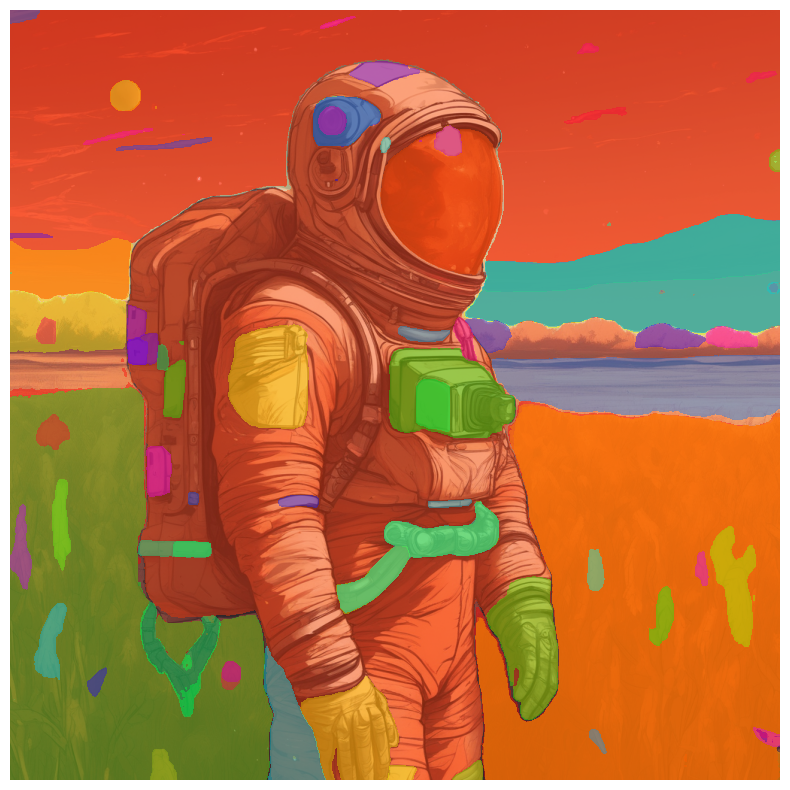

In [27]:
plot_original_image_with_masks(image, [mask["segmentation"] for mask in masks])